In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [84]:
test_set = pd.read_csv("test.csv")
train_set = pd.read_csv("train.csv")

In [85]:
train_set.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [86]:
test_set.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [87]:
train_set.info()
print("--"*40)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
customer_id                         10738 non-null object
customer_visit_score                10738 non-null float64
customer_product_search_score       10696 non-null float64
customer_ctr_score                  10738 non-null float64
customer_stay_score                 10701 non-null float64
customer_frequency_score            10738 non-null float64
customer_product_variation_score    10692 non-null float64
customer_order_score                10672 non-null float64
customer_affinity_score             10738 non-null float64
customer_active_segment             10715 non-null object
X1                                  10701 non-null object
customer_category                   10738 non-null int64
dtypes: float64(8), int64(1), object(3)
memory usage: 1006.8+ KB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Rang

In [88]:
print(train_set.shape, test_set.shape)

# Drop the 'customer_id' as these are system generated unique ID and it wont add any value to the analysis
train_set.drop(['customer_id'], axis='columns', inplace=True)
test_set.drop(['customer_id'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(train_set.shape, test_set.shape)

(10738, 12) (7160, 11)
(10738, 11) (7160, 10)


### Checking for unique value to understand categorical variable present in Data

In [89]:
print(train_set.nunique())
print('--'*60)
print(test_set.nunique())

customer_visit_score                10738
customer_product_search_score       10696
customer_ctr_score                  10738
customer_stay_score                 10701
customer_frequency_score            10738
customer_product_variation_score    10692
customer_order_score                10672
customer_affinity_score             10738
customer_active_segment                 5
X1                                      5
customer_category                       2
dtype: int64
------------------------------------------------------------------------------------------------------------------------
customer_visit_score                7160
customer_product_search_score       7131
customer_ctr_score                  7160
customer_stay_score                 7144
customer_frequency_score            7160
customer_product_variation_score    7117
customer_order_score                7119
customer_affinity_score             7160
customer_active_segment                5
X1                                 

> From above we can say there are 2 features can be consider as categorical nominal feature, getting glimpse of values for categorical feature

> Let get the look into categorical data

In [90]:
print(train_set['customer_active_segment'].value_counts())
print(train_set['X1'].value_counts())

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64
BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64


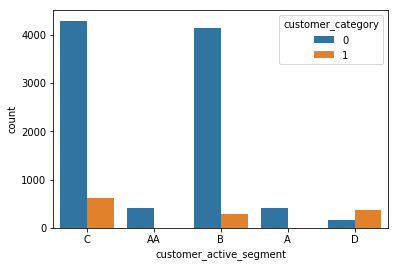

In [12]:
sns.countplot(x='customer_active_segment',hue ='customer_category', data=train_set)

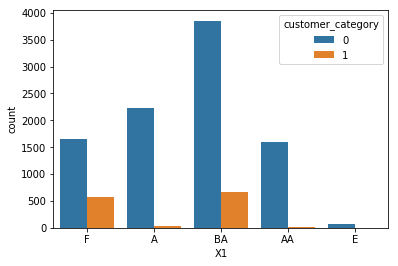

In [13]:
sns.countplot(x='X1',hue ='customer_category', data=train_set)

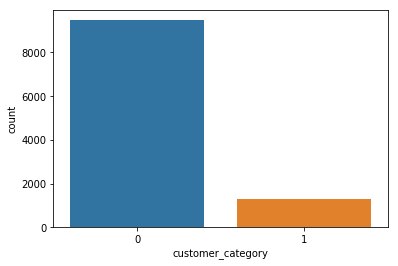

In [15]:
sns.countplot(x='customer_category',data=train_set)

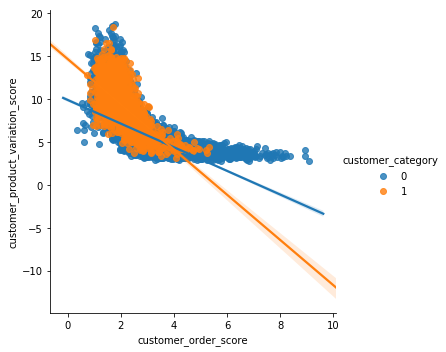

In [122]:
sns.lmplot(y = "customer_product_variation_score",x = "customer_order_score",data=train_set,hue = 'customer_category')

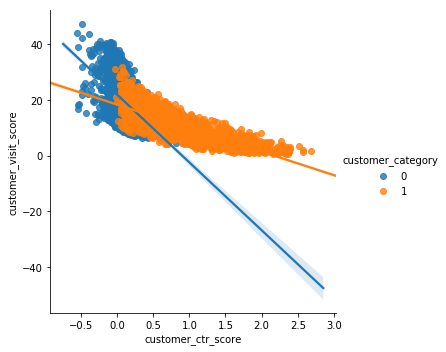

In [121]:
sns.lmplot(y = "customer_visit_score",x = "customer_ctr_score",data=train_set,hue = 'customer_category')

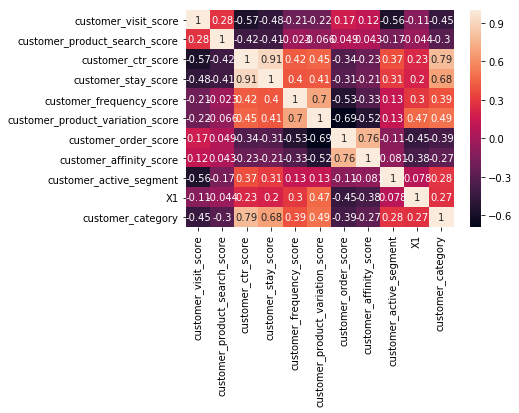

In [123]:
corrMatrix = train_set.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

>From the correlation matrix we are getting few relation, we have to dug deep to understand the relation between attribute or its a false alarm

>1. negative correlation between Customer product variation score vs Customer order score.(-0.69)
>2. negative correlation between Customer visit Score vs Custome ctr score(0.57)
>3. Positive Correlation between Customer ctr score vs Customer stay score.(0.91)
>4.Positive Correlation between Customer product variation score vs Customer frequency score.(0.7)


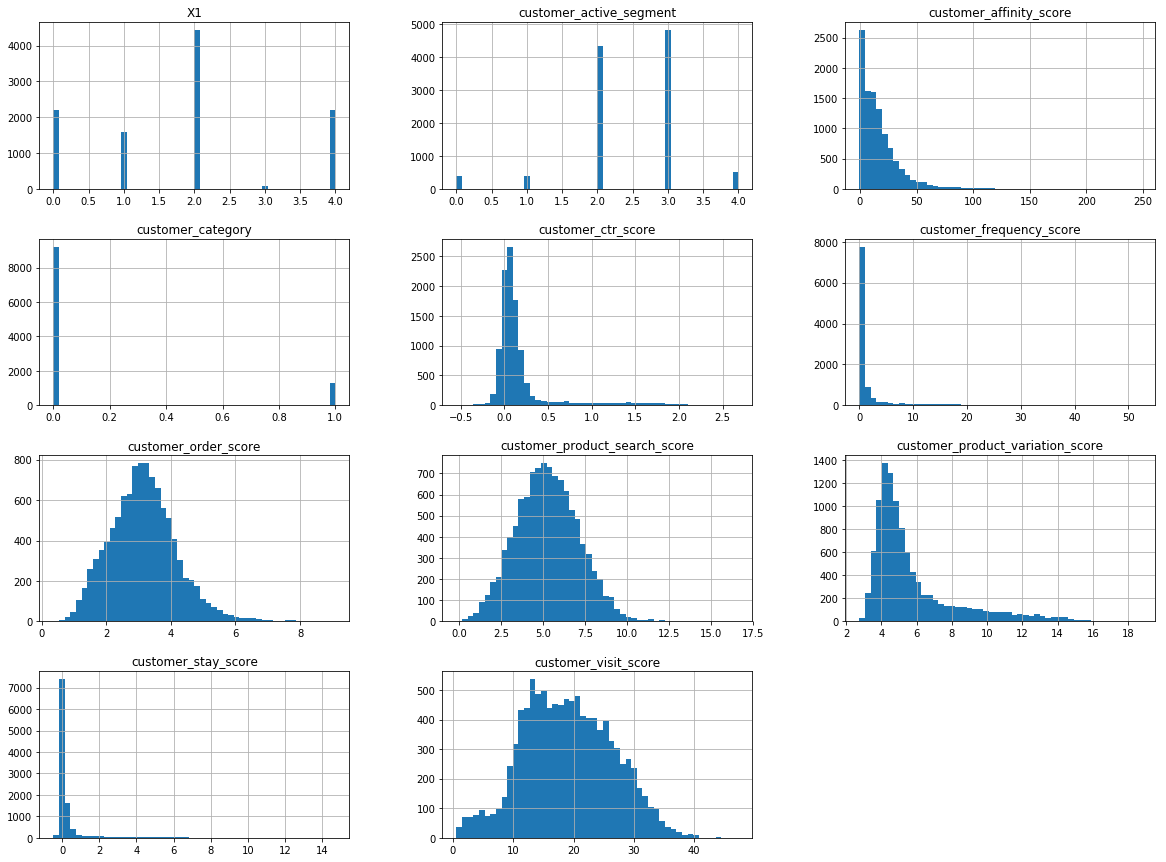

In [124]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

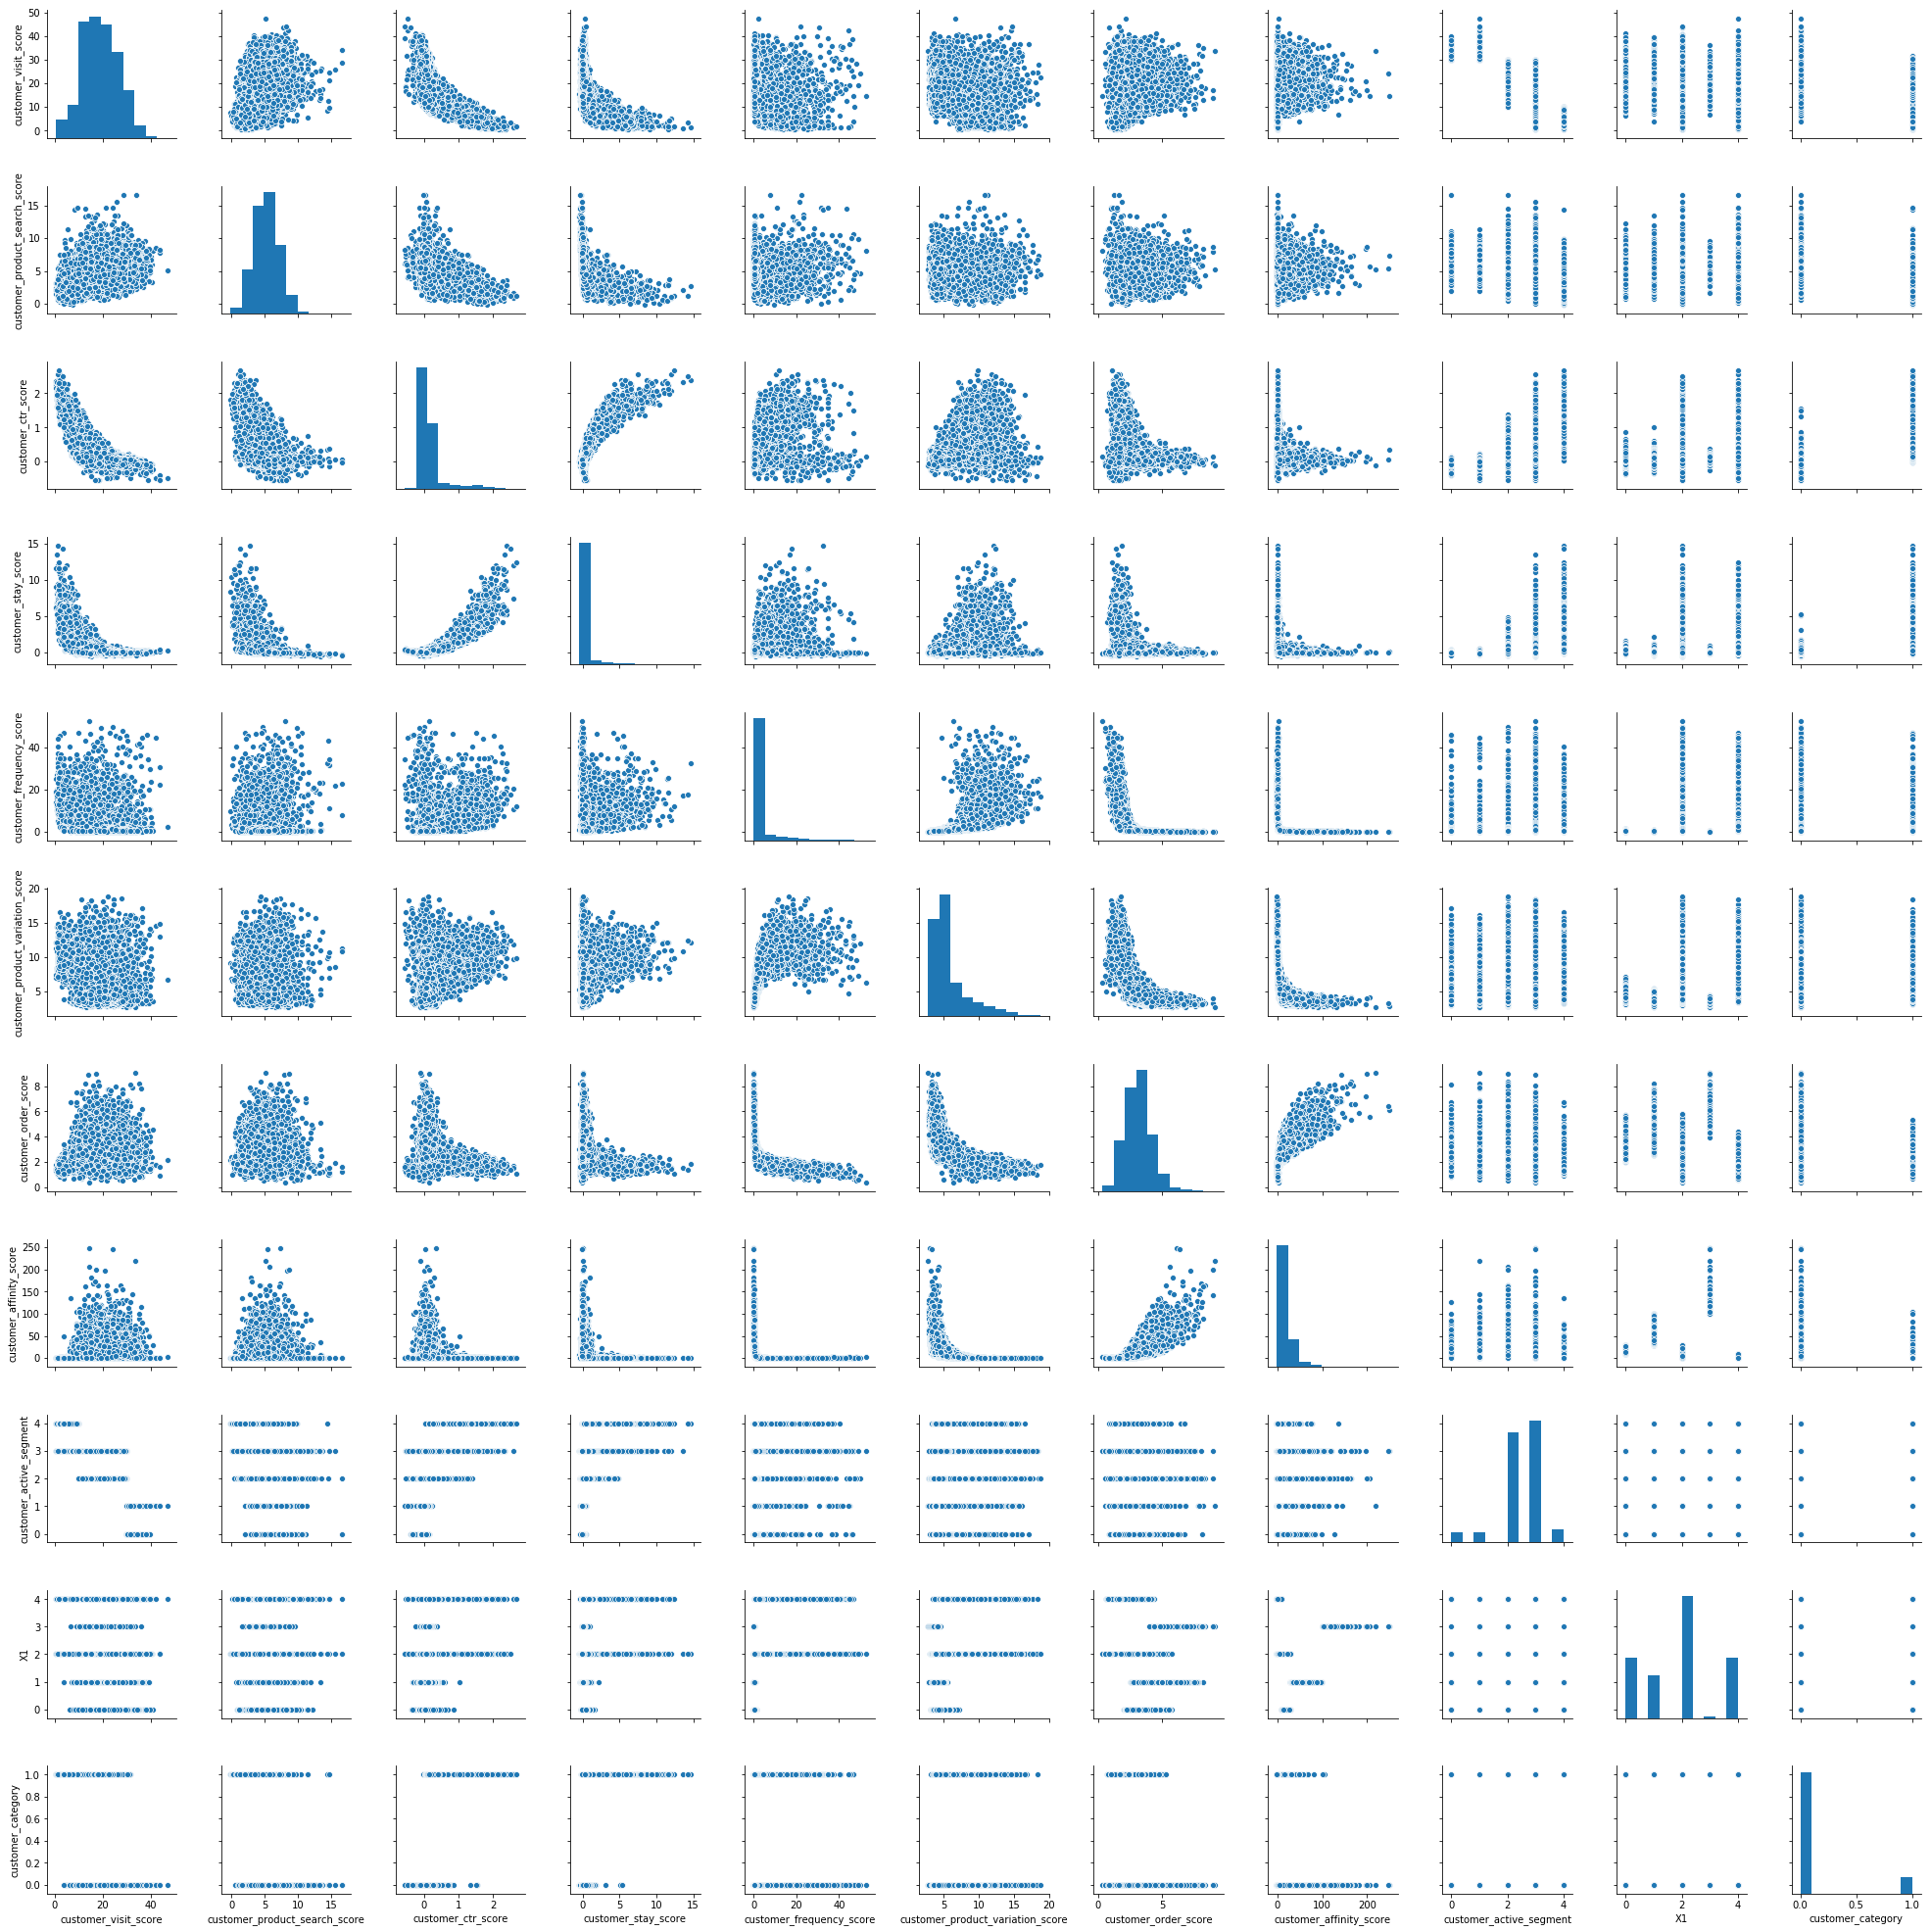

In [126]:
sns.pairplot(train_set)

In [91]:
#Checking for nulls in train set
train_set.isnull().sum()

customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

> As can be seen from plot, data is highly imbalanced we have to either do upsampling or downsampling to make model behave correctly. Otherwise if we proceed with same data then there is good chance we will end up with bad model who will be unable to identify patter for customer category '1'

In [92]:
#Checking for nulls in test set
test_set.isnull().sum()

customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

> Planing to drop train set null values and proportional is less, and we will be using imputer from Sklearn to replace null value in test set as we cannot drop them

In [93]:
print(train_set.shape)
train_set.dropna(inplace=True)
print(train_set.shape)

(10738, 11)
(10491, 11)


In [94]:
def nans(df): return df[df.isnull().any(axis=1)]

In [95]:
#nans(test_set)

>Next, if the feature is not already numerical, we need to encode it as one. We can use pandas Categorical codes for this task. To make things more simple, I will use a loop to apply this on every feature that isn’t an integer.

In [96]:
def cat_to_numerical(df):
    for feature in df.columns: # Loop through all columns in the dataframe
        if df[feature].dtype == 'object': # Only apply for columns with categorical strings
            df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer
    return df

In [97]:
cat_to_numerical(test_set)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 10 columns):
customer_visit_score                7160 non-null float64
customer_product_search_score       7131 non-null float64
customer_ctr_score                  7160 non-null float64
customer_stay_score                 7144 non-null float64
customer_frequency_score            7160 non-null float64
customer_product_variation_score    7117 non-null float64
customer_order_score                7119 non-null float64
customer_affinity_score             7160 non-null float64
customer_active_segment             7160 non-null int8
X1                                  7160 non-null int8
dtypes: float64(8), int8(2)
memory usage: 461.6 KB


In [98]:
test_set.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,2,1
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,2,2
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,3,2


In [99]:
nans(test_set)

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
6,24.254240,6.666042,0.019566,-0.039929,0.469825,NaN,2.496885,8.181275,3,4
93,3.549613,4.001714,1.601265,3.827581,21.244281,10.062632,NaN,-0.125645,3,4
155,20.949847,6.921174,0.285842,0.019365,20.803131,NaN,1.187122,-0.133929,2,2
196,27.977276,5.656726,0.053324,-0.074387,4.285852,8.799014,NaN,0.642456,3,2
355,10.153000,NaN,0.121544,0.040387,0.437221,3.866508,2.483532,9.110110,3,4
358,24.600295,NaN,0.180399,0.210346,0.160301,3.403307,5.576558,56.877652,2,1
363,19.149337,6.206149,0.089181,0.020339,0.168731,NaN,3.560071,33.479908,2,1
406,12.275635,4.549984,0.093164,0.039087,0.698296,NaN,2.906205,13.889706,2,2
411,31.686700,6.711721,0.035291,-0.117399,0.925731,5.895085,NaN,5.212109,1,4
432,13.676585,7.650842,0.013126,NaN,0.540013,4.721328,2.867298,22.898362,2,0


In [100]:
col = test_set.columns

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
imputer = imputer.fit(test_set[:])
test_set = imputer.transform(test_set)

In [101]:

type(test_set)

pandas.core.frame.DataFrame

In [102]:
test_set_imputed = pd.DataFrame(test_set)
test_set_imputed.columns = col

In [103]:
test_set_imputed.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,2,2
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,2,1
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,2,1
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,2,2
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,3,2


In [104]:
print(train_set.shape, test_set_imputed.shape)

(10491, 11) (7160, 10)


In [105]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10491 entries, 0 to 10737
Data columns (total 11 columns):
customer_visit_score                10491 non-null float64
customer_product_search_score       10491 non-null float64
customer_ctr_score                  10491 non-null float64
customer_stay_score                 10491 non-null float64
customer_frequency_score            10491 non-null float64
customer_product_variation_score    10491 non-null float64
customer_order_score                10491 non-null float64
customer_affinity_score             10491 non-null float64
customer_active_segment             10491 non-null object
X1                                  10491 non-null object
customer_category                   10491 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 983.5+ KB


In [106]:
train_set = cat_to_numerical(train_set)
train_set.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,3,4,0
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,3,0,0
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,3,2,0
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,1,4,0
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,3,1,0


In [107]:
y_train = train_set['customer_category']
X_train = train_set.drop(['customer_category'], axis=1)
X_test = test_set_imputed

In [109]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

> As data is imbalanced, max_delta_step

In [110]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'max_delta_step':1,
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [111]:
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
       subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [114]:
optimized_GBM.best_score_

0.9744542941568964

In [115]:
optimized_GBM.error_score

'raise-deprecating'

## Predicting 

In [118]:
test_df_cust = pd.read_csv('test.csv')
customer_id_test_df = test_df_cust['customer_id']
test_set_imputed['customer_category']=optimized_GBM.predict(test_set_imputed)
test_set_imputed['customer_id']=customer_id_test_df

In [119]:
test_set_imputed.to_csv("Submission_XGBoost_Model.csv",columns=['customer_id','customer_category'],index=False)